/home/seungyong/zipline/lib/python3.5/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



39000.0
78000.0
117000.0
156000.0


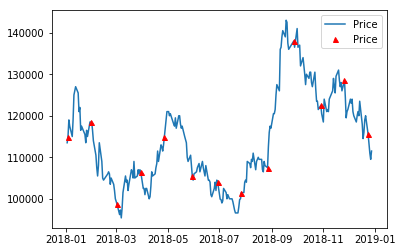

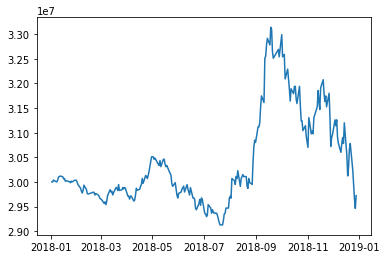

In [3]:
#!/home/seungyong/zipline/bin/python3

from datetime import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
from zipline.api import order_target, record, symbol, order
from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import create_simulation_parameters
from trading_calendars import get_calendar
import FinanceDataReader as fdr

start = datetime(2018,1,1)
end = datetime(2018,12,31)
df = fdr.DataReader('000150',start,end)
quantity = 10
period = 20
d_period = 60
dividend = 1300

# Backtesting
def initialize(context):
    context.i = 0
    context.symbol = symbol('DOOSAN')

def handle_data(context, data):
    context.i += 1
    dividend_sum = 0

    if context.i == 1 or context.i%period == 0:
        order(context.symbol, quantity) 
    
    if context.i%d_period == 0:
        dividend_sum = ((context.i/d_period)*quantity*(d_period/period))*dividend
        print(dividend_sum)

    record(Price=data.current(context.symbol,'price'),dividend_sum=dividend_sum)

data = df[['Close']]
data.columns = ['DOOSAN']
xkrx_calendar=get_calendar('XKRX')

algo = TradingAlgorithm(sim_params=create_simulation_parameters(capital_base=30000000,trading_calendar=xkrx_calendar),\
        initialize=initialize,handle_data=handle_data,trading_calendar=xkrx_calendar)
result = algo.run(data) 

# Plot
plt.plot(result.index, result.Price)
buy_trans = result.loc[[t != [] for t in result.transactions]]
buy = buy_trans.loc[[t[0]['amount'] > 0 for t in buy_trans.transactions]]
plt.plot(buy.index, result.Price.loc[buy.index],'^',markersize=5,color='r')
plt.legend(loc='best')
plt.show()

plt.plot(result.index, result.portfolio_value)
plt.show()


/home/seungyong/zipline/lib/python3.5/site-packages/ipykernel_launcher.py:50: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

/home/seungyong/zipline/lib/python3.5/site-packages/empyrical/stats.py:711: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/home/seungyong/zipline/lib/python3.5/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


[list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
 list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
 list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
 list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
 list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
 list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
 list([])
 list([{'price': 102051.0, 'sid': Equity(0 [DOOSAN]), 'order_id': '9840bec2ec0644eeb8f7b3636dae10bc', 'commission': None, 'dt': Timestamp('2018-03-15 06:30:00+0000', tz='UTC'), 'amount': 100}])
 list([]) list([]) list([]) list([]) list([]) list([]) list([]) list([])
 list([]) list([]) list([]) list([]) list([]) list([])
 list([{'price': 102448.75, 'sid': Equity(0 [DOOSAN]), 'order_id': '0f40facef6704604aeb63d2046f0e277', 'commission': None, 'dt': Timestamp('2018-04-05 06:30:00+0000', tz='UTC'), 'amount': -100}])
 list([]) list([]) list([]) list([

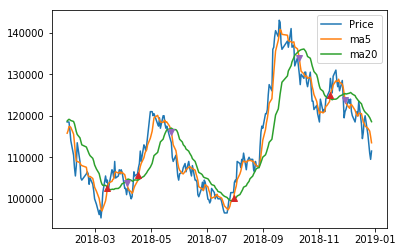

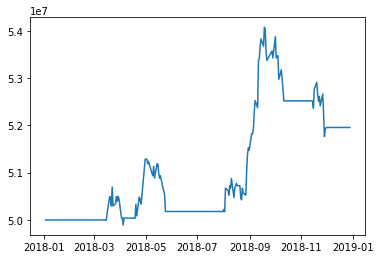

In [2]:
#!/home/seungyong/zipline/bin/python3

from datetime import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
from zipline.api import order_target, record, symbol, order
from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import create_simulation_parameters
from trading_calendars import get_calendar
import FinanceDataReader as fdr

start = datetime(2018,1,1)
end = datetime(2018,12,31)
df=fdr.DataReader('000150',start,end)

# Backtesting
def initialize(context):
    context.i = 0
    context.symbol = symbol('DOOSAN')
    context.hold = False

def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return
    
    buy = False
    sell = False
    ma5 = data.history(context.symbol, 'price', 5, '1d').mean()
    ma20 = data.history(context.symbol, 'price', 20, '1d').mean()
    
    if ma5 > ma20 and context.hold == False:
        order(context.symbol, 100)
        context.hold = True
        buy = True
    elif ma5 < ma20 and context.hold == True:
        order(context.symbol, -100)
        context.hold = False
        sell = True
    
    record(Price=data.current(context.symbol,'price'),ma5=ma5,ma20=ma20,buy=buy,sell=sell)

data = df[['Close']]
data.columns = ['DOOSAN']
xkrx_calendar=get_calendar('XKRX')

algo = TradingAlgorithm(sim_params=create_simulation_parameters(capital_base=50000000,trading_calendar=xkrx_calendar),\
        initialize=initialize,handle_data=handle_data,trading_calendar=xkrx_calendar)
result = algo.run(data) 

# Plot
print(result.transactions.values) 

plt.plot(result.index, result.Price)
plt.plot(result.index, result.ma5)
plt.plot(result.index, result.ma20)
plt.legend(loc='best')
plt.plot(result.loc[result.buy == True].index, result.ma5[result.buy == True], '^')
plt.plot(result.loc[result.sell == True].index, result.ma5[result.sell == True], 'v')
plt.show()

plt.plot(result.index, result.portfolio_value)
plt.show()


In [1]:
!ls

FindMore	README.md  console     manage.py  sma	  templates
FindMore.ipynb	bah	   db.sqlite3  mra	  static
